# 画像データの背景除去処理

In [1]:
#rembgインストール
!pip install -q  rembg
!pip install -q onnxruntime


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install -q natsort


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from natsort import natsorted
from glob import glob
from rembg import remove
import cv2
import os

import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

C:\Users\keisu\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
# ディレクトリの作成
os.mkdir("Asari_rembg1")
os.mkdir("Asari_rembg1/1")
os.mkdir("Asari_rembg1/2")
os.mkdir("Asari_rembg1/3")
os.mkdir("Asari_rembg1/4")

In [38]:
#背景除去
paths=natsorted(glob(r"Asari_images/Aichi/*.jpg"))
for i in range(len(paths)):
    input_path = paths[i]
    output_path = 'Asari_rembg1/1/1output'+str(i)+'.jpg'

    input = cv2.imread(input_path)
    output = remove(input)
    cv2.imwrite(output_path, output)


paths=natsorted(glob(r"Asari_images/Chiba/*.jpg"))
for i in range(len(paths)):
    input_path = paths[i]
    output_path = 'Asari_rembg1/2/2output'+str(i)+'.jpg'

    input = cv2.imread(input_path)
    output = remove(input)
    cv2.imwrite(output_path, output)



paths=natsorted(glob(r"Asari_images/China/*.jpg"))
for i in range(len(paths)):
    input_path = paths[i]
    output_path = 'Asari_rembg1/3/3output'+str(i)+'.jpg'

    input = cv2.imread(input_path)
    output = remove(input)
    cv2.imwrite(output_path, output)


paths=natsorted(glob(r"Asari_images/Korea/*.jpg"))
for i in range(len(paths)):
    input_path = paths[i]
    output_path = 'Asari_rembg1/4/4output'+str(i)+'.jpg'

    input = cv2.imread(input_path)
    output = remove(input)
    cv2.imwrite(output_path, output)

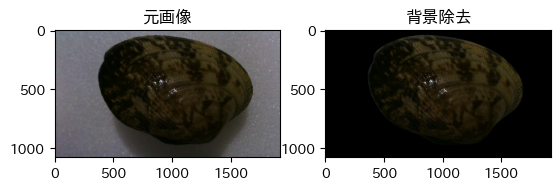

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Jupyterでインライン表示するための宣言
%matplotlib inline 

#画像の読み込み
paths=natsorted(glob(r"Asari_images/Korea/*.jpg"))
im1 = Image.open(paths[1])
im2= Image.open( 'Asari_rembg1/4/4output1.jpg')

#画像をarrayに変換
im_list1 = np.asarray(im1)
im_list2 = np.asarray(im2)
#貼り付け
plt.subplot(1,2,1)
plt.imshow(im_list1)
plt.title('元画像')
plt.subplot(1,2,2)
plt.imshow(im_list2)
plt.title('背景除去')
#表示
plt.show()


#### フォルダの中の写真
1. 愛知県産
2. 千葉県産
3. 中国産
4. 韓国産

# 学習

In [22]:
#!pip install -q torchmetrics==0.11.4 pytorch_lightning==2.0.2

In [17]:
# インストールした torchmetrics のバージョンを確認
import torchmetrics
from torchmetrics.functional import accuracy

print(torchmetrics.__version__)

# インストールした PyTorch Lightning のバージョンを確認
import pytorch_lightning as pl

print(pl.__version__)

0.11.4
2.0.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision import datasets
import torchsummary
from torchsummary import summary
from pytorch_lightning.loggers import CSVLogger

import os
import random

import pandas as pd
import pytorch_lightning as pl
import torch
from PIL import Image
from pytorch_lightning.callbacks import Callback, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger
from torch import nn
from torch.utils.data import DataLoader, Dataset,ConcatDataset
from torchmetrics import Accuracy, F1Score, Precision, Recall
from torchvision import models, transforms
from torchvision.datasets import ImageFolder

from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint, LearningRateMonitor

C:\Users\keisu\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [10]:
#前処理
transform=transforms.Compose([transforms.ToTensor()])

In [11]:
# 学習済みモデルに合わせた前処理を追加
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomRotation(degrees = 5),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [12]:
#前処理とアノテーション(ラベル付け)
dataset=datasets.ImageFolder("Asari_rembg1",transform)

In [13]:
from sklearn.model_selection import train_test_split
import torch

# データとラベルの抽出
data = torch.stack([sample[0] for sample in dataset])
labels = torch.tensor([sample[1] for sample in dataset])

# トレーニング、検証、テストに分割
train_data, temp_data, train_labels, temp_labels = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=0)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.5, stratify=temp_labels, random_state=0)

# Datasetに戻す
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
val_dataset = torch.utils.data.TensorDataset(val_data, val_labels)
test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)

# バッチサイズの定義
batch_size = 8

# Data Loader を定義
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size)


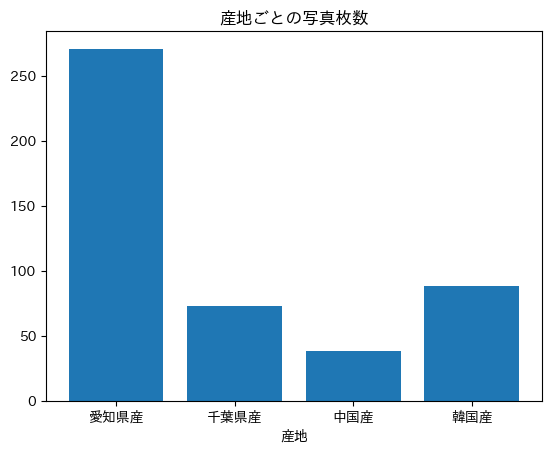

In [14]:

class1 = len(os.listdir("Asari_rembg1/1"))
class2 = len(os.listdir("Asari_rembg1/2"))
class3 = len(os.listdir("Asari_rembg1/3"))
class4 = len(os.listdir("Asari_rembg1/4"))

plt.bar(x=["愛知県産", "千葉県産", "中国産", "韓国産"], height=[class1, class2, class3, class4])

# 関数名を使用
plt.xlabel("産地")
plt.title("産地ごとの写真枚数")
plt.show()


In [15]:
from torchvision.models.resnet import resnet18
class Net(pl.LightningModule):

    def __init__(self):
        super().__init__()

        self.feature = resnet18(pretrained=True)
        self.fc = nn.Sequential(nn.Linear(1000, 512),  # 修正: 1000.in_features -> 1000
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 4))
        
        
    #######################不均衡データなのでクラスラベルに重みを適応する#################

        print("weights:", class1, class2, class3, class4)
        
        
        
        # クラスのサンプル数
        class_counts = torch.tensor([class1, class2, class3, class4], dtype=torch.float)
        
        
        # クラスの重みを計算（逆数）
        class_weights = 1.0 / class_counts
        
        
        # 重みを正規化
        class_weights = class_weights / class_weights.sum()
        
        print(class_weights)
        
        
        ####################################################################################
        
        self.criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.001)

        


    def forward(self, x):
        h = self.feature(x)
        h = self.fc(h)
        return h


    def training_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = self.criterion(y, t)
        self.log('train_loss', loss, on_step=False, on_epoch=True)
        self.log('train_acc', accuracy(y.softmax(dim=-1), t, task='multiclass', num_classes=4, top_k=1), on_step=False, on_epoch=True)
        return loss


    def validation_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = self.criterion(y, t)
        self.log('val_loss', loss, on_step=False, on_epoch=True)
        self.log('val_acc', accuracy(y.softmax(dim=-1), t, task='multiclass', num_classes=4, top_k=1), on_step=False, on_epoch=True)
        return loss


    def test_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = self.criterion(y, t)
        self.log('test_loss', loss, on_step=False, on_epoch=True)
        self.log('test_acc', accuracy(y.softmax(dim=-1), t, task='multiclass', num_classes=4, top_k=1), on_step=False, on_epoch=True)
        return loss


    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        return optimizer

In [18]:
# 学習の実行
pl.seed_everything(0)
net = Net()
logger = CSVLogger(save_dir='logs', name='my_exp')
trainer = pl.Trainer(callbacks=[EarlyStopping(monitor='val_loss')],max_epochs=20, accelerator="auto", deterministic=False, logger=logger)
trainer.fit(net, train_loader, val_loader)

# ベストのチェックポイントをロード
best_model_path = trainer.checkpoint_callback.best_model_path

# モデルをロードしてテスト実行
best_model = Net.load_from_checkpoint(best_model_path)
trainer.test(best_model, dataloaders=test_loader)

Global seed set to 0
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type             | Params
-----------------------------------------------
0 | feature   | ResNet           | 11.7 M
1 | fc        | Sequential       | 514 K 
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
12.2 M    Trainable params
0         Non-trainable params
12.2 M    Total params
48.816    Total estimated model params size (MB)


weights: 271 73 38 88
tensor([0.0670, 0.2488, 0.4779, 0.2064])


Sanity Checking: 0it [00:00, ?it/s]

C:\Users\keisu\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\keisu\anaconda3\lib\site-packages\pytorch_lightning\loops\fit_loop.py:280: PossibleUserWarning: The number of training batches (41) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

weights: 271 73 38 88
tensor([0.0670, 0.2488, 0.4779, 0.2064])


C:\Users\keisu\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9718309640884399
        test_loss           0.10875505208969116
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.10875505208969116, 'test_acc': 0.9718309640884399}]

In [19]:
# 学習ログの取得
log = pd.read_csv('logs/my_exp/version_0/metrics.csv')

Text(0.5, 0, 'epochs')

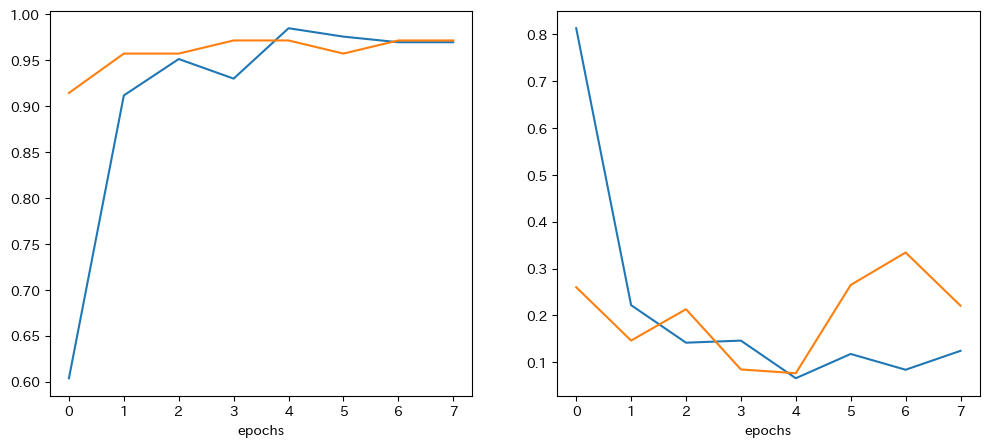

In [20]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.plot(log[['train_acc', 'epoch']].dropna(how='any', axis=0).reset_index()['train_acc'])
plt.plot(log[['val_acc', 'epoch']].dropna(how='any', axis=0).reset_index()['val_acc'])
plt.xlabel("epochs")

plt.subplot(1,2,2)
plt.plot(log[['train_loss', 'epoch']].dropna(how='any', axis=0).reset_index()['train_loss'])
plt.plot(log[['val_loss', 'epoch']].dropna(how='any', axis=0).reset_index()['val_loss'])
plt.xlabel("epochs")


In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# 学習済みモデルを保存
torch.save(net.state_dict(), 'Assari_classification_weights.pt')

In [23]:
net = Net().cpu().eval()
net.load_state_dict(torch.load('Assari_classification_remBG.pt', map_location=torch.device('cpu'),weights_only=False),strict=False)

C:\Users\keisu\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\keisu\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


weights: 271 73 38 88
tensor([0.0670, 0.2488, 0.4779, 0.2064])


<All keys matched successfully>

In [43]:
label = []
pred = []

for x, t in test_dataset:
    x = x
    y = net(x.unsqueeze(0))  
    pred.append(y.argmax())
    label.append(t)


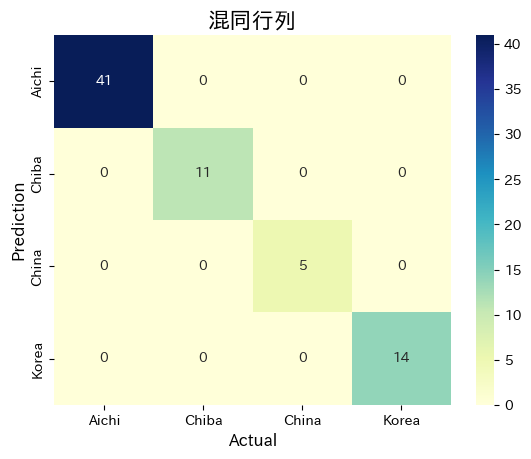

In [51]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

confusion_matrix = metrics.confusion_matrix(label, pred)

# Plot the confusion matrix
sns.heatmap(confusion_matrix, annot=True,fmt='d', cmap='YlGnBu', xticklabels=["Aichi","Chiba","China","Korea"], yticklabels=["Aichi","Chiba","China","Korea"])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('混同行列',fontsize=16)
plt.show()

## GradCamで判断根拠を可視化

In [10]:
print(net)

Net(
  (feature): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [11]:
#最後のconv層をtarget_layerに指定する
net.feature.layer4[-1].conv2

Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [12]:
net.eval()
target_layer=net.feature.layer4[-1].conv2

In [ ]:
#!pip install -q grad-cam

In [16]:
# Grad-CAM
from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp
from torchvision.utils import make_grid, save_image

gradcam = GradCAM(net, target_layer)
gradcam_pp = GradCAMpp(net, target_layer)

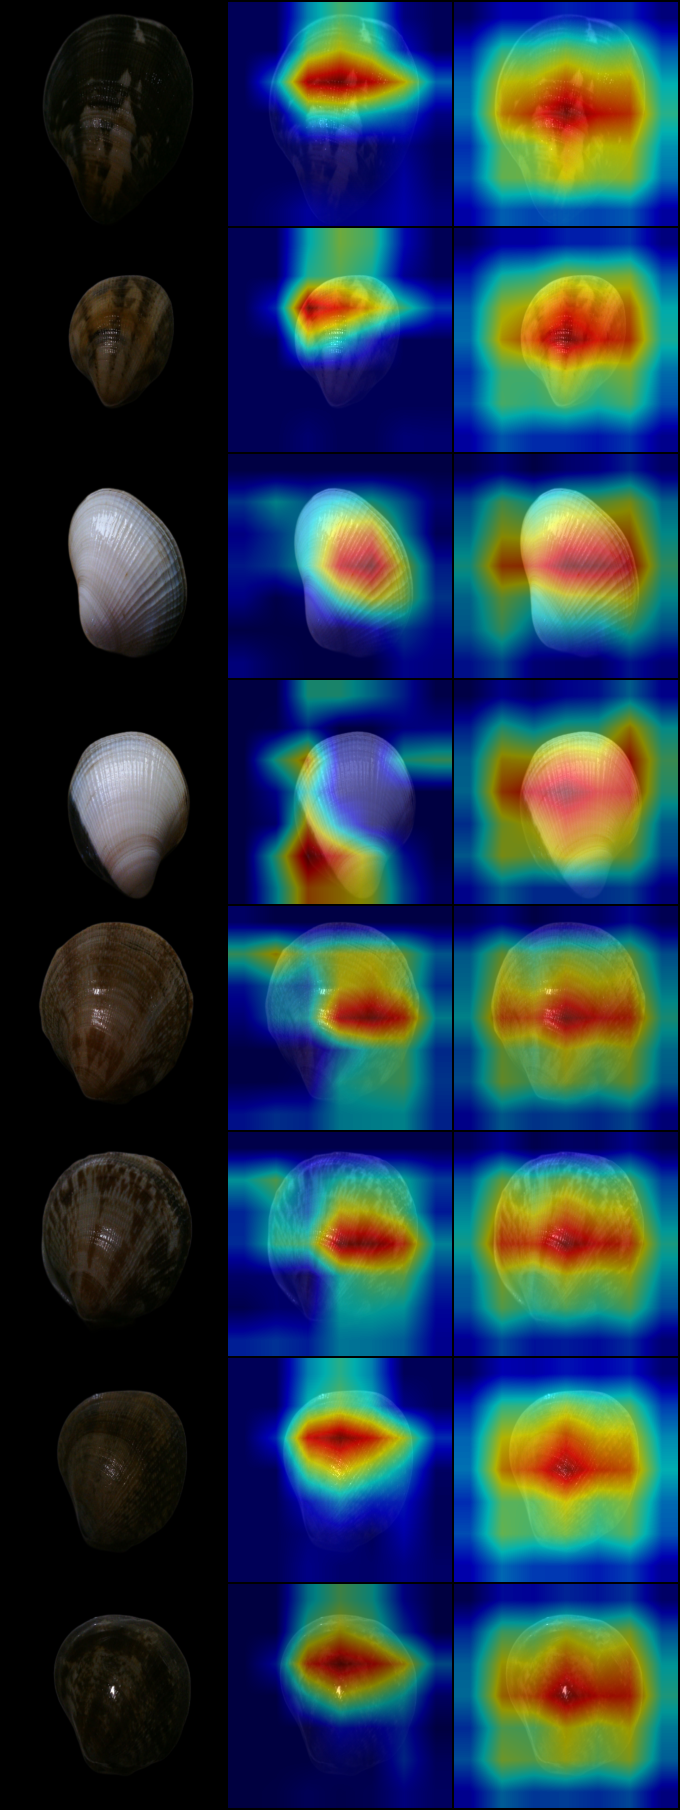

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available()  else "cpu")
images = []
# あるラベルの検証用データセットを呼び出してる想定
paths=["Asari_rembg1/1/1output2.jpg","Asari_rembg1/1/1output270.jpg","Asari_rembg1/2/2output1.jpg","Asari_rembg1/2/2output0.jpg","Asari_rembg1/3/3output29.jpg","Asari_rembg1/3/3output11.jpg","Asari_rembg1/4/4output60.jpg","Asari_rembg1/4/4output87.jpg"]
for path in paths:
    img = Image.open(path)
    torch_img = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])(img).to(device)
    normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(torch_img)[None]
    mask, _ = gradcam(normed_torch_img)
    heatmap, result = visualize_cam(mask, torch_img)

    mask_pp, _ = gradcam_pp(normed_torch_img)
    heatmap_pp, result_pp = visualize_cam(mask_pp, torch_img)

    images.extend([torch_img.cpu(), result, result_pp])
grid_image = make_grid(images, nrow=3)

# 結果の表示
transforms.ToPILImage()(grid_image)